In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("data/VisaFile.csv", encoding="latin1", low_memory=False)

df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
)

df["case_received_date"] = pd.to_datetime(df["case_received_date"],format="mixed", errors="coerce")
df["decision_date"] = pd.to_datetime(df["decision_date"],format="mixed", errors="coerce")

df = df.dropna(subset=["case_received_date", "decision_date"])

df["processing_time_days"] = (
    df["decision_date"] - df["case_received_date"]
).dt.days

df = df[df["processing_time_days"] >= 0]

df.head()


,case_number,visa_status,employer_name,prevailing_wage_submitted,prevailing_wage_submitted_unit,paid_wage_submitted,paid_wage_submitted_unit,job_title,work_city,prevailing_wage_soc_code,prevailing_wage_soc_title,work_state,full_time_position_y_n,visa_class,job_title_subgroup,order,case_received_date,decision_date,processing_time_days
0,I-200-13014-224796,certified,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24042,2013-01-22,2013-01-28,6
1,I-200-13036-300926,denied,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24066,2013-02-13,2013-02-19,6
2,I-200-13044-506275,certified,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24071,2013-02-19,2013-02-25,6
3,I-200-13035-351096,certified,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24072,2013-02-20,2013-02-26,6
4,I-200-13032-621173,certified,GOOGLE INC.,100984.0,year,105000.0,year,SOFTWARE ENGINEER,MOUNTAIN VIEW,15-1132,"Software Developers, Applications",CA,y,H-1B,software engineer,24073,2013-02-20,2013-02-26,6


In [4]:
df.shape


(129575, 19)

In [5]:
df["processing_time_days"].describe()


count    129575.000000
mean        113.374254
std         192.580760
min           0.000000
25%           6.000000
50%           9.000000
75%         181.000000
max        2649.000000
Name: processing_time_days, dtype: float64

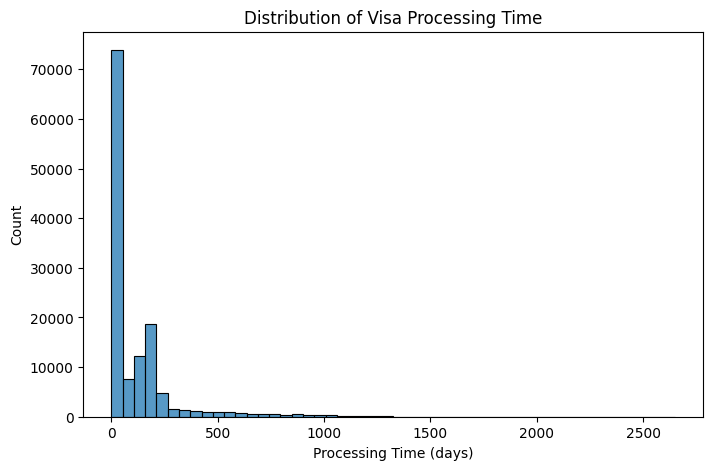

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["processing_time_days"], bins=50)
plt.xlabel("Processing Time (days)")
plt.title("Distribution of Visa Processing Time")
plt.show()


In [7]:
df = df[df["processing_time_days"] <= 365]


In [8]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['prevailing_wage_submitted', 'paid_wage_submitted', 'order',
       'processing_time_days'],
      dtype='object')

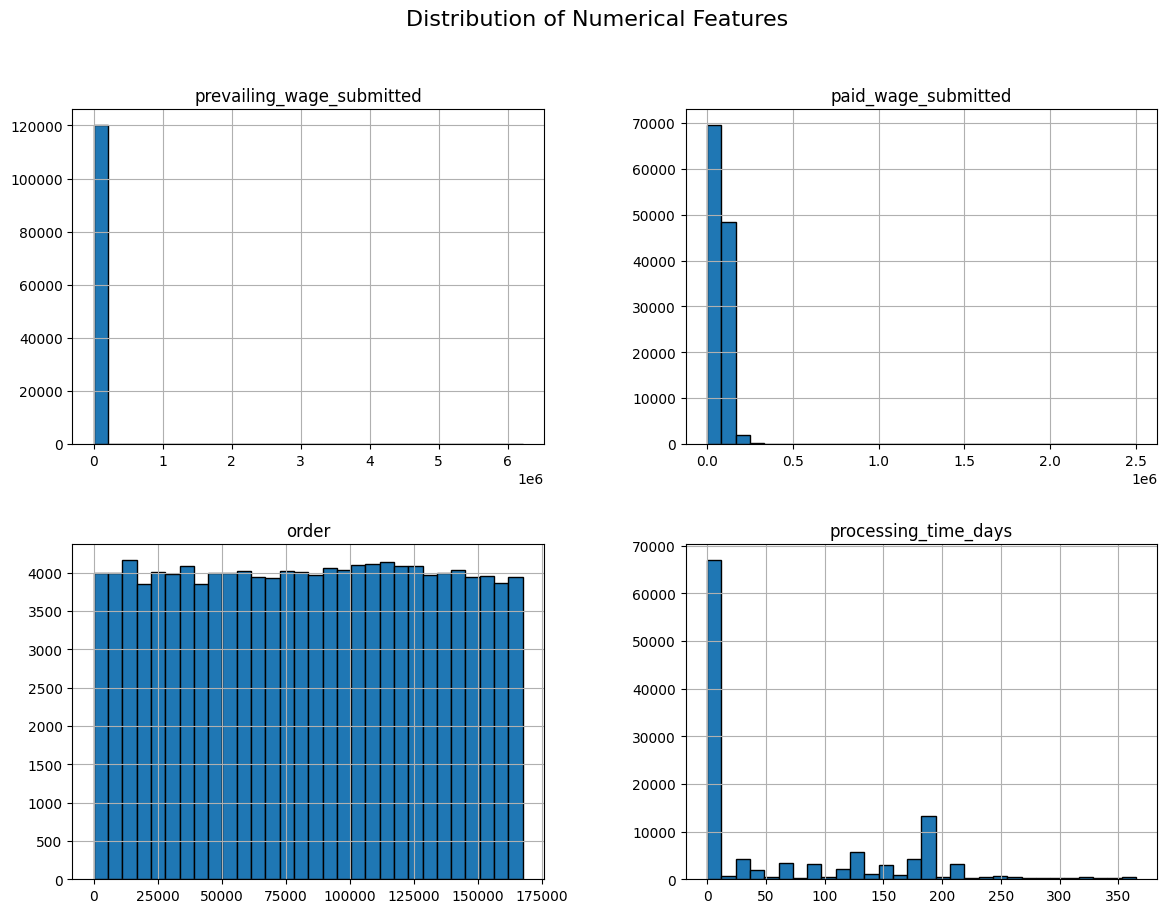

In [9]:
df[num_cols].hist(
    figsize=(14, 10),
    bins=30,
    edgecolor="black"
)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


In [10]:
df.select_dtypes(include="object").columns


Index(['case_number', 'visa_status', 'employer_name',
       'prevailing_wage_submitted_unit', 'paid_wage_submitted_unit',
       'job_title', 'work_city', 'prevailing_wage_soc_code',
       'prevailing_wage_soc_title', 'work_state', 'full_time_position_y_n',
       'visa_class', 'job_title_subgroup'],
      dtype='object')

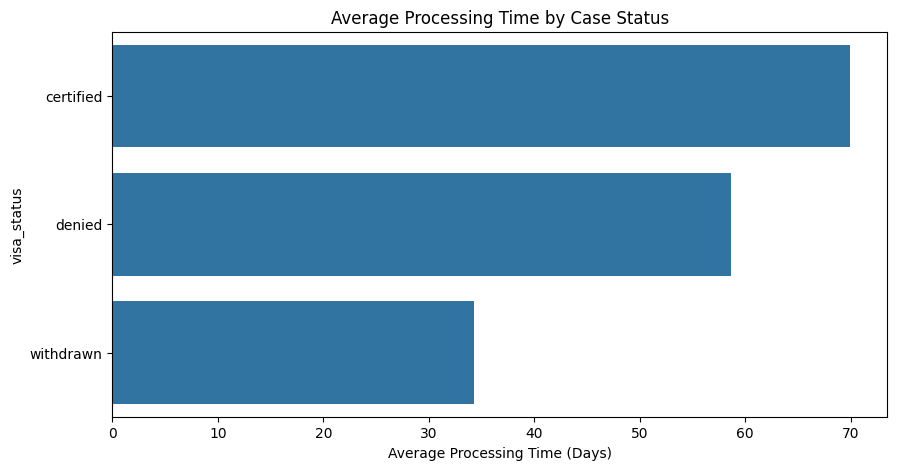

In [12]:
top_categories = (
    df.groupby("visa_status")["processing_time_days"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.xlabel("Average Processing Time (Days)")
plt.ylabel("visa_status")
plt.title("Average Processing Time by Case Status")
plt.show()


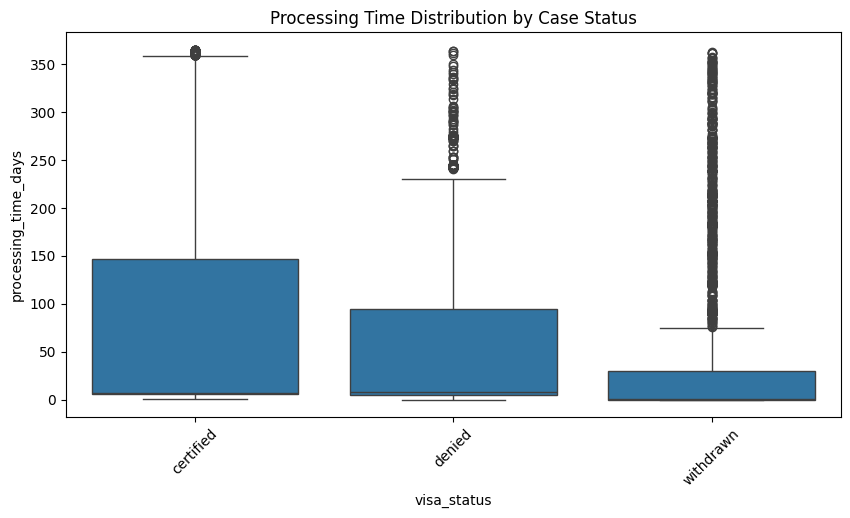

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x="visa_status",
    y="processing_time_days",
    data=df
)
plt.xticks(rotation=45)
plt.title("Processing Time Distribution by Case Status")
plt.show()


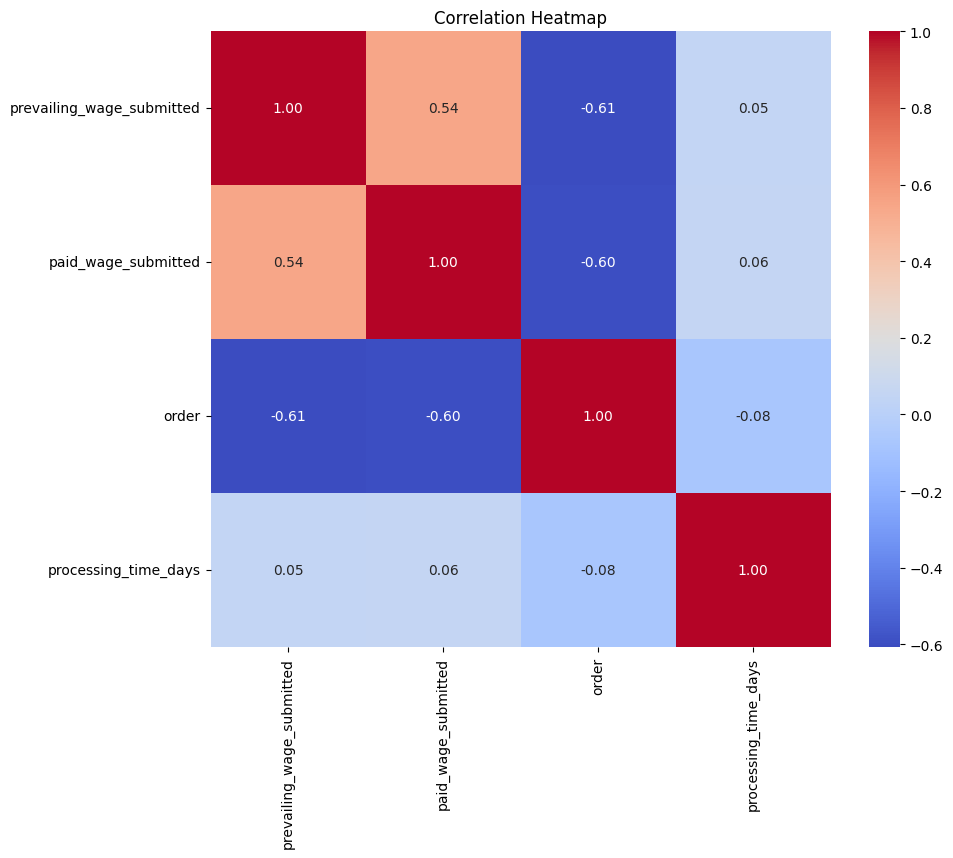

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()


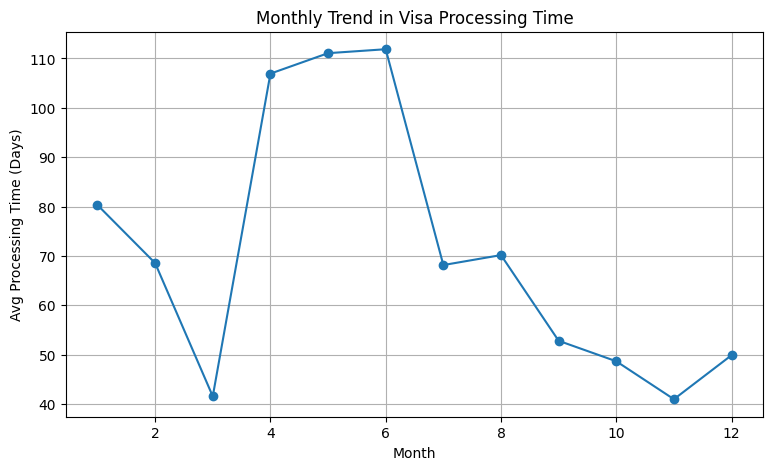

In [16]:
df["month"] = df["case_received_date"].dt.month

monthly_avg = df.groupby("month")["processing_time_days"].mean()

plt.figure(figsize=(9, 5))
monthly_avg.plot(marker="o")
plt.xlabel("Month")
plt.ylabel("Avg Processing Time (Days)")
plt.title("Monthly Trend in Visa Processing Time")
plt.grid(True)
plt.show()


“Processing time varies seasonally, likely due to application volume.”

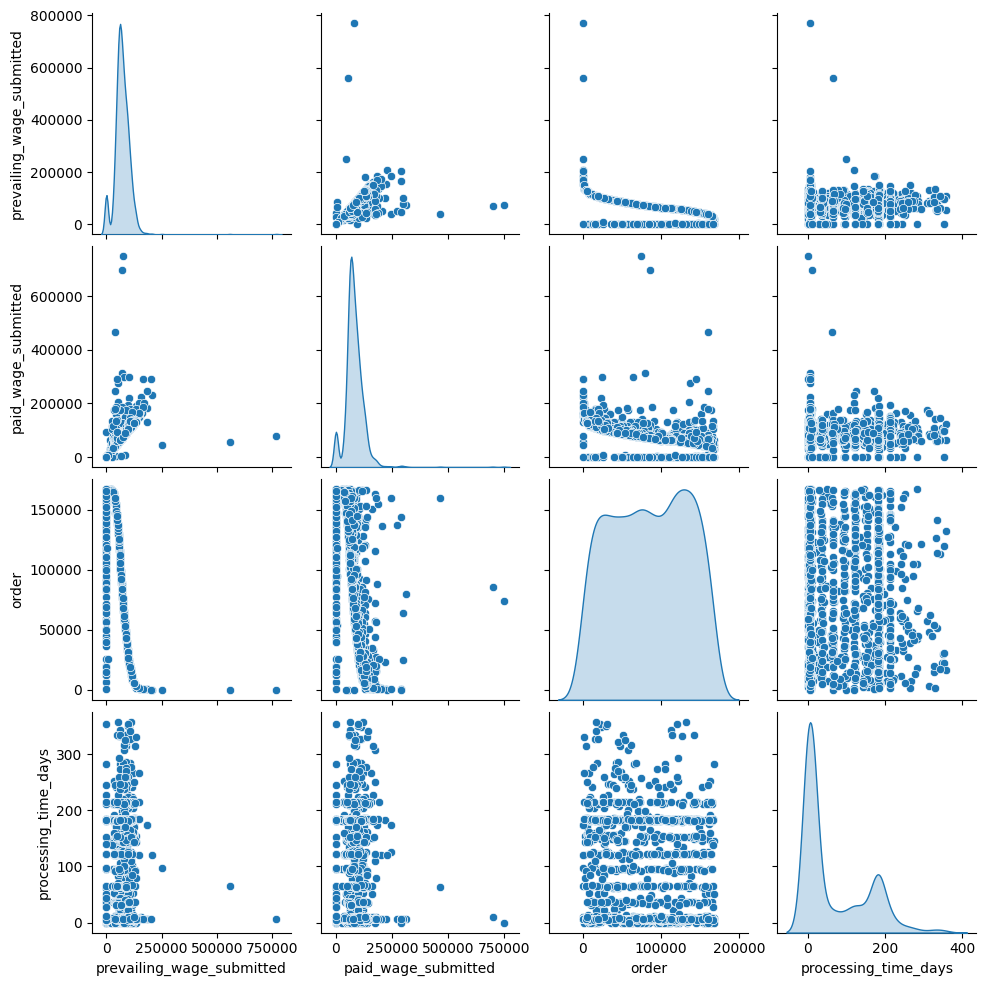

In [17]:
sns.pairplot(
    df[num_cols].sample(2000),
    diag_kind="kde"
)
plt.show()


To avoid memory issues.

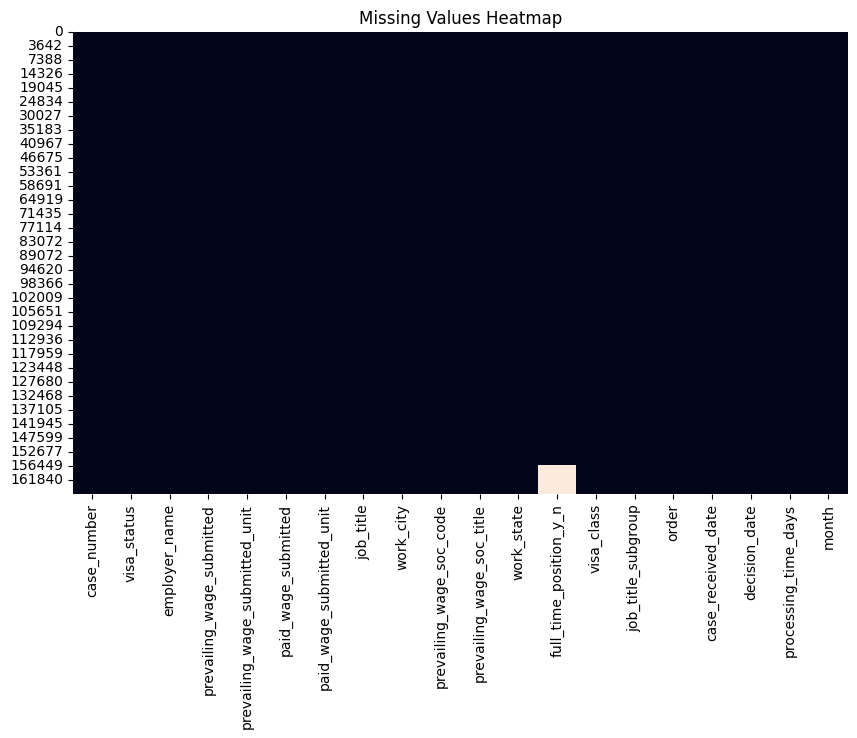

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


## Extended EDA Summary

- Numerical features show right-skewed distributions
- Processing time varies significantly across case categories
- Strong seasonality observed in monthly trends
- Outliers exist and require capping before ML modeling
- Correlation analysis helps reduce redundant features


In [19]:
df.columns


Index(['case_number', 'visa_status', 'employer_name',
       'prevailing_wage_submitted', 'prevailing_wage_submitted_unit',
       'paid_wage_submitted', 'paid_wage_submitted_unit', 'job_title',
       'work_city', 'prevailing_wage_soc_code', 'prevailing_wage_soc_title',
       'work_state', 'full_time_position_y_n', 'visa_class',
       'job_title_subgroup', 'order', 'case_received_date', 'decision_date',
       'processing_time_days', 'month'],
      dtype='object')

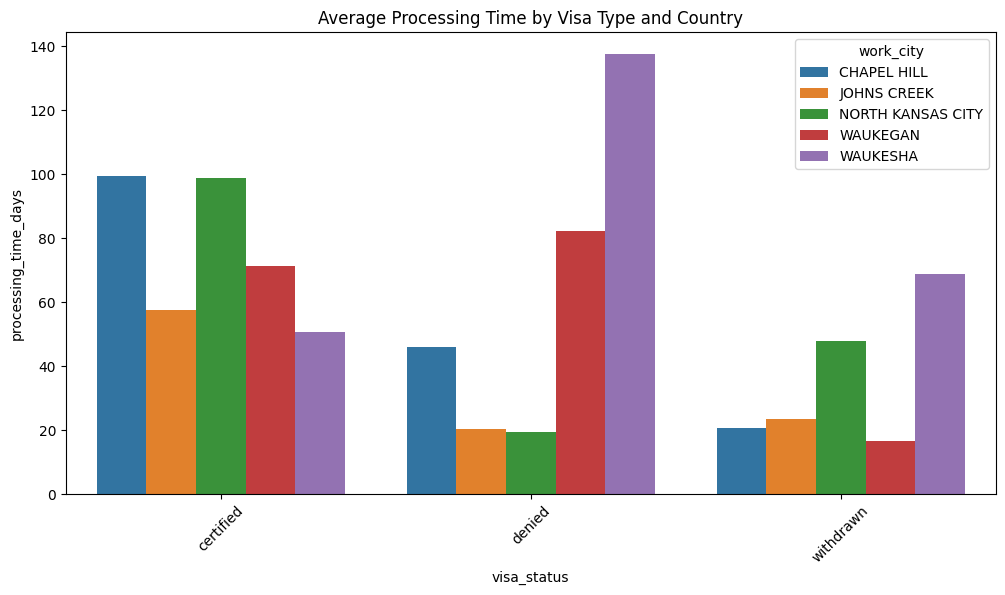

In [21]:
pivot_df = (
    df.groupby(["visa_status", "work_city"])["processing_time_days"]
    .mean()
    .reset_index()
)

top_countries = (
    pivot_df["work_city"]
    .value_counts()
    .head(5)
    .index
)

filtered = pivot_df[pivot_df["work_city"].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered,
    x="visa_status",
    y="processing_time_days",
    hue="work_city"
)
plt.xticks(rotation=45)
plt.title("Average Processing Time by Visa Type and Country")
plt.show()


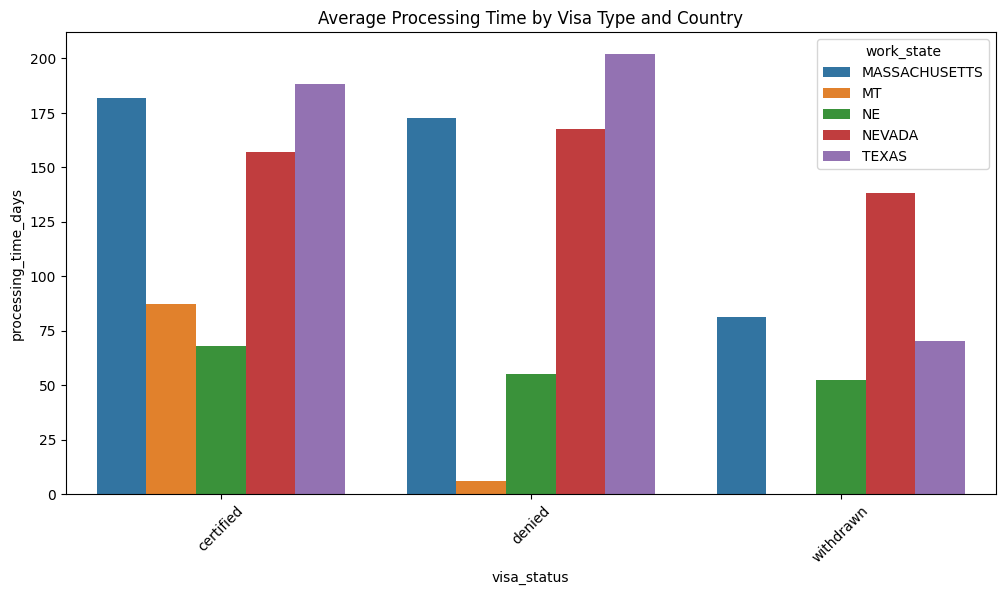

In [22]:
pivot_df = (
    df.groupby(["visa_status", "work_state"])["processing_time_days"]
    .mean()
    .reset_index()
)

top_countries = (
    pivot_df["work_state"]
    .value_counts()
    .head(5)
    .index
)

filtered = pivot_df[pivot_df["work_state"].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered,
    x="visa_status",
    y="processing_time_days",
    hue="work_state"
)
plt.xticks(rotation=45)
plt.title("Average Processing Time by Visa Type and Country")
plt.show()

## Feature Insights
- Processing time varies significantly across visa categories
- Certain regions consistently show longer average processing times
- Seasonal features (month, year) influence processing duration
- Extreme outliers exist and must be handled before modeling
- Some categorical features have high variance and are strong ML candidates
